<a href="https://colab.research.google.com/github/saitodisse/vida-com-ia-curso-2025/blob/master/exercicios_overfitting_underfitting_regularizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios - Overfitting, Underfitting e Regularização

## Lista de Exercícios Computacionais

Esta lista tem como objetivo explorar na prática os conceitos de overfitting, underfitting, viés-variância e regularização com L1, L2 e dropout.

## Parte 1: Overfitting, Underfitting e Trade-off Viés-Variância

### Exercício 1.1 - Overfitting e Underfitting em Regressão

Treine modelos com diferentes graus (1, 3 e 10, por exemplo). Compare erros de treino/teste e visualize.

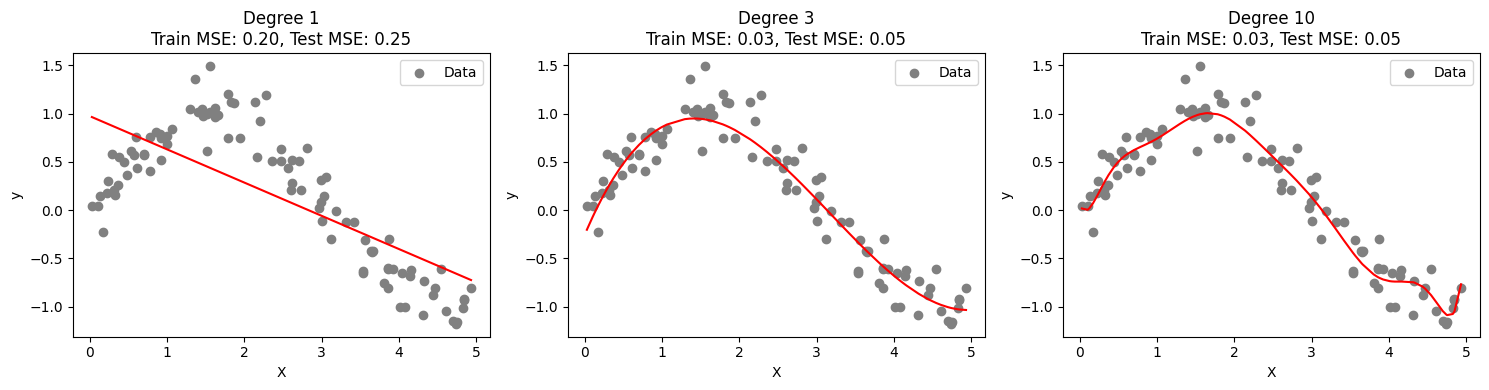

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

degrees = [1, 3, 10]
plt.figure(figsize=(15, 4))
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, y, color='gray', label='Data')
    plt.plot(X, model.predict(X), color='red')
    plt.title(f'Degree {degree}\nTrain MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
plt.tight_layout()
plt.show()

- Analise os resultados. Qual grau do polinomio causou:
  - Overfitting:
  - Underfitting:
  - Optimal fit:




- Explique o que acontece nesta linha de código:

```
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
```

  - make_pipeline:
  - PolynomialFeatures(degree):
  - LinearRegression():

### Exercício 1.2 - Overfitting e Underfitting em Classificação

In [ ]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions # use esta função para

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

configs = [(2,), (20,), (50, 50, 50)]
plt.figure(figsize=(15, 4))
for i, hidden_layer_sizes in enumerate(configs):
    clf = None # instancie o classificador e faça o .fit, use a classe MLPClassifier
    acc_train = # calcule a acuracia (score) de treino
    acc_test = # calcule a acuracia (score) de teste
    plt.subplot(1, 3, i + 1)
    plot_decision_regions(X_test, y_test, clf=clf)
    plt.title(f'Hidden layers: {hidden_layer_sizes}\nTrain acc: {acc_train:.2f}, Test acc: {acc_test:.2f}')
plt.tight_layout()
plt.show()

- Treine MLPClassifier com diferentes arquiteturas e identifique casos de overfitting/underfitting.

- Modifique a arquitetura e veja o que acontece.

### Exercício 1.3 - Trade-off Viés e Variância

**Agora é a sua vez!**

Experimente diferentes tamanhos de conjunto de treinamento e analise o comportamento do erro.

## Parte 2: Regularização - L1, L2, Lasso e Ridge

### Exercício 2.1 - L1 vs L2 em Regressão

Treine os modelos LinearRegressionm, Ridge e Lasso. Compare coeficientes e desempenho.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=100, n_informative=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Treine o ridge e o lasso e compare os coeficientes

- Discuta sobre o coeficiente dos modelos:
  - Qual deles tem mais coeficientes igual a 0?
  - Qual tem a menor e a maior média e desvio padrão dos valores dos coeficientes?

- Plote os pesos dos 3 modelos e visualize!

### Exercício 2.2 - Implementação do Lasso e Ridge na loss.

Implemente a mse, as regularizações l1 e l2, e o Ridge e Lasso e verifique a diferença entre elas!

In [ ]:
# Implementação manual simples de perda com penalidade L1 e L2

def mse_loss(y_true, y_pred):
    pass # implemente aqui

def loss_L1(weights):
    pass # implemente aqui

def loss_L2(weights):
    pass # implemente aqui

def loss_Lasso(y_true, y_pred, weights, alpha=0.1):
    pass # implemente aqui

def loss_Ridge(y_true, y_pred, weights, alpha=0.1):
    pass # implemente aqui

# Simulando dados
X = np.random.randn(100, 3)
true_w = np.array([1.5, -2.0, 0.0])
y = X @ true_w + np.random.randn(100) * 0.5

# Coeficientes simulados
w_pred = np.random.randn(3)

# Cálculo das perdas
y_pred = X @ w_pred
print("Loss mse:", loss_mse(y, y_pred))
print("Loss L1:", loss_Lasso(y, y_pred, w_pred))
print("Loss L2:", loss_Ridge(y, y_pred, w_pred))


## Parte 3: Dropout com PyTorch

### Exercício 3.1 - Dropout em Treinamento e Inferência

Teste o modelo com e sem dropout, comparando o comportamento em modo `train()` vs `eval()`.

In [ ]:
import torch
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
        return x

model = SimpleNet()
x = torch.randn(1, 2)
model.train()
out_train = model(x)
model.eval()
out_eval = model(x)
print('Saída em treino:', out_train.item())
print('Saída em avaliação:', out_eval.item())

**Agora é sua vez!** Escolha um dataset, escreva o loop de treinamento e avalie o modelo.

- Treine o modelo com e sem dropout para a ver a diferença na curva de treinamento e validação.

## Exercício Bônus - Early Stopping

**Early stopping é um técnica que interrompe o treinamento caso a loss de validação não diminua em N epochs.**

Implemente early stopping acompanhando erro de validação durante o treinamento de um MLP. Voce apenas precisará de modificar o loop de treinamento do exercício anterior.